All the imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
import matplotlib as mpl
from skimage import io, color, filters
from skimage.filters import sobel
from skimage.feature._canny import canny
from skimage.transform import resize, rotate
import pandas as pd 
from skimage import io, color, filters, feature, restoration
from skimage.transform import resize, rotate
from skimage import data
from skimage.feature._canny import canny
from PIL import Image
import cv2 as cv
import os
plt.style.use('ggplot')

In [18]:
img = io.imread('../Alz_data/train/ModerateDemented/moderateDem0.jpg')
img.shape

(208, 176)

Import JPEG's 

In [3]:
def read_and_resize(file):
    img = io.imread(file)
    img = resize(img, (32,32))
    return img

mod1 = read_and_resize('../Alz_data/train/ModerateDemented/moderateDem0.jpg')
non1 = read_and_resize('../Alz_data/train/NonDemented/nonDem0.jpg')

In [4]:
mod1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
mod1.shape

(32, 32)

In [6]:
non1.shape

(32, 32)

In [14]:
def make_gray(img):
    img = color.rgb2gray(img)
    return img   

def apply_sobel(img):
    return filters.sobel(img)

def apply_canny(img):
    return feature.canny(img, sigma=2)

def restoration_bi(img):
    return restoration.denoise_bilateral(img, sigma_spatial=5)

def restoration_cham(img):
    return restoration.denoise_tv_chambolle(img, weight=.1)

images = [mod1, non1]


In [15]:
non_dems = [apply_sobel(non1),
        apply_canny(non1),
        restoration_bi(non1),
        restoration_cham(non1)]

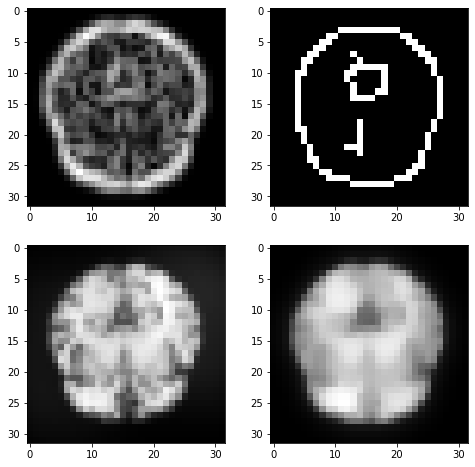

In [16]:
def graph_filters(img):    
    fig, axs = plt.subplots(2,2, figsize=(8,8))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(img[idx], cmap='gray')
    plt.show()
    
graph_filters(non_dems)

Clustering

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=70, random_state=0).fit(mod1)
dem2show = kmeans.cluster_centers_[kmeans.labels_]

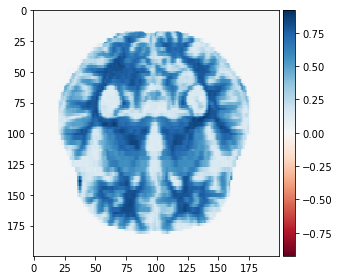

In [12]:
def cluster(image):
    kmeans = KMeans(n_clusters=70, random_state=0).fit(image)
    clusters = dem2show = kmeans.cluster_centers_[kmeans.labels_]
    final = clusters.reshape(image.shape[0], image.shape[1])
    return io.imshow(final)

cluster(mod1)

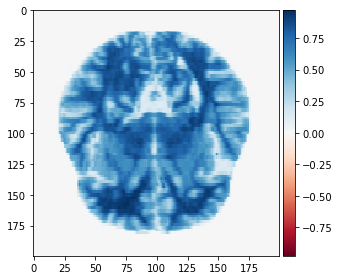

In [13]:
cluster(non1)

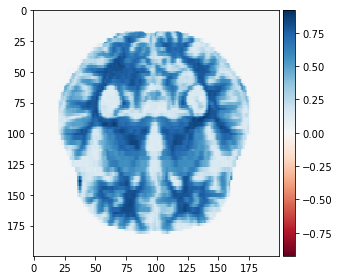

In [49]:
cluster_i1 = dem2show.reshape(mod1.shape[0], mod1.shape[1])
io.imshow(cluster_i1)

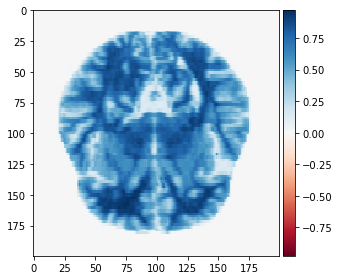

In [47]:
kmeans = KMeans(n_clusters=70, random_state=0).fit(non1)
non2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_non = non2show.reshape(non1.shape[0], non1.shape[1])
io.imshow(cluster_non)